### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report , f1_score
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
##
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

#### 1) Reading Data

In [3]:
columns_names=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']
data = pd.read_csv('cc_approvals.data',names = columns_names )
data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


#### 2) Data Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
def showDetails():
    global data 
    for col in data.columns:
        print(f'for feature {col}')
        print(f'number of ? in column {len(data.loc[data[col] == "?"])} \n')
        print(f'number of b in column {len(data.loc[data[col] == "b"])} \n')
        print(f'number of unique Values {data[col].nunique()} \n')
        print(f'Random Value 1 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print(f'Random Value 2 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print(f'Random Value 3 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print("\n" + 30*"-" + "\n")

In [7]:
showDetails()

for feature Gender
number of ? in column 12 

number of b in column 468 

number of unique Values 3 

Random Value 1 :
b 

Random Value 2 :
b 

Random Value 3 :
b 


------------------------------

for feature Age
number of ? in column 12 

number of b in column 0 

number of unique Values 350 

Random Value 1 :
22.67 

Random Value 2 :
36.75 

Random Value 3 :
26.67 


------------------------------

for feature Debt
number of ? in column 0 

number of b in column 0 

number of unique Values 215 

Random Value 1 :
3.75 

Random Value 2 :
1.25 

Random Value 3 :
1.25 


------------------------------

for feature Married
number of ? in column 6 

number of b in column 0 

number of unique Values 4 

Random Value 1 :
u 

Random Value 2 :
u 

Random Value 3 :
u 


------------------------------

for feature BankCustomer
number of ? in column 6 

number of b in column 0 

number of unique Values 4 

Random Value 1 :
g 

Random Value 2 :
g 

Random Value 3 :
g 


--------------------------

C:\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
## retrieve columns in our DataFrame 
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

##### Gender Column

In [9]:
# handling missing values in "Gender" column ,and replace the missing value with most frequent value
# in "Gender" Column
data.loc[data.Gender == "?",'Gender'] = data['Gender'].mode()[0]

In [10]:
data['Gender'] = data['Gender'].apply(lambda x :1 if x == "b" else 0)
data['Gender'].value_counts()

1    480
0    210
Name: Gender, dtype: int64

##### Age Column

In [30]:
data[data['Age'] < 18].shape

(35, 16)

In [11]:
## handling missing values in "Age" column by replacing ? with median of column
data.loc[data['Age'] == "?",'Age'] = data[data['Age'] != "?"]['Age'].median()

In [12]:
data['Age'] = data['Age'].astype(float)

##### Married Column 

In [13]:
# married Column has 6 "?"
data['Married'].value_counts()

u    519
y    163
?      6
l      2
Name: Married, dtype: int64

In [14]:
# replacing "?" with  mode of column
data.loc[data.Married == "?","Married"] = data['Married'].mode()[0]

##### BankCustomer Column

In [15]:
# Backcutomer column has 6 value of "?" , let's handle it 
data['BankCustomer'].value_counts()

g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

In [16]:
data.loc[data.BankCustomer == "?" , "BankCustomer"] = data['BankCustomer'].mode()[0]

In [17]:
data['BankCustomer'].value_counts()

g     525
p     163
gg      2
Name: BankCustomer, dtype: int64

##### EducationLevel Column

In [18]:
data['EducationLevel'].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [19]:
data.loc[data.EducationLevel == "?" , "EducationLevel"] = data['EducationLevel'].mode()[0]
data['EducationLevel'].value_counts()

c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

##### Income Column

In [20]:
data['Income'].describe()

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: Income, dtype: float64

In [21]:
data['Income'].value_counts()

0       295
1        29
1000     10
500      10
2         9
       ... 
2503      1
6590      1
1465      1
5552      1
283       1
Name: Income, Length: 240, dtype: int64

In [31]:
data[data['Income'] < 100]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,u,g,w,v,1.250,t,1,1,f,g,00202,0,+
3,1,27.83,1.540,u,g,w,v,3.750,t,1,5,t,g,00100,3,+
4,1,20.17,5.625,u,g,w,v,1.710,t,0,0,f,s,00120,0,+
5,1,32.08,4.000,u,g,m,v,2.500,t,0,0,t,g,00360,0,+
10,1,22.08,0.830,u,g,c,h,2.165,f,0,0,t,g,00128,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1,36.42,0.750,y,p,d,v,0.585,f,0,0,f,g,00240,3,-
684,1,40.58,3.290,u,g,m,v,3.500,f,0,0,t,s,00400,0,-
685,1,21.08,10.085,y,p,e,h,1.250,f,0,0,f,g,00260,0,-
687,0,25.25,13.500,y,p,ff,ff,2.000,f,1,1,t,g,00200,1,-


In [22]:
# getting Categorical Columns in our data to handle it 
data.select_dtypes(include='object').columns

Index(['Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode',
       'Approved'],
      dtype='object')

##### Employed Column

In [23]:
data['Employed'].value_counts()

f    395
t    295
Name: Employed, dtype: int64

In [24]:
data['Employed'] = data['Employed'].apply(lambda x :1 if x =="t" else 0)
data['Employed'].value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [25]:
data['YearsEmployed'].value_counts()

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: YearsEmployed, Length: 132, dtype: int64

##### Approved Column

In [486]:
data['Approved'].value_counts()

-    383
+    307
Name: Approved, dtype: int64

In [487]:
data['Approved'] = data['Approved'].apply(lambda x :1 if x == "+" else 0)
data['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

#### DriversLicense Column

In [488]:
data['DriversLicense'].value_counts()

f    374
t    316
Name: DriversLicense, dtype: int64

In [489]:
data['DriversLicense'] = data['DriversLicense'].apply(lambda x :1 if x == "t" else 0)
data['DriversLicense'].value_counts()

0    374
1    316
Name: DriversLicense, dtype: int64

#### PriorDefault Column

In [490]:
data['PriorDefault'] = data['PriorDefault'].apply(lambda x :1 if x == "t" else 0)
data['PriorDefault'].value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [491]:
data.groupby('Approved').mean()

,Gender,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
Approved,,,,,,,,,
0,0.707572,29.773029,3.839948,1.257924,0.201044,0.224543,0.631854,0.443864,198.605744
1,0.680782,33.686221,5.904951,3.427899,0.925081,0.680782,4.605863,0.475570,2038.859935


#### 3) Data Visualization

In [521]:
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [512]:
def countPlot(feature):
    global data
    plt.figure(figsize=(10,6))
    sns.countplot(data=data , x=feature)
def Pie(feature,limit = 10):
    global data
    plt.figure(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:limit] , labels=data[feature].value_counts()[:limit].index
           ,autopct = '%1.2f%%',labeldistance= 1.1)
def kdePlot(feature):
    global data
    plt.figure(figsize=(10,6))
    sns.kdeplot(data[feature],shade=True)

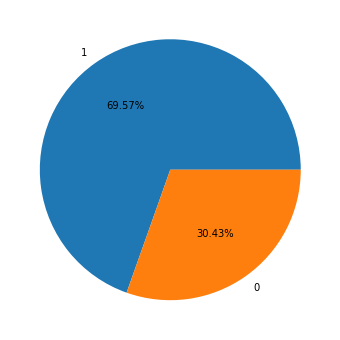

In [513]:
Pie('Gender')

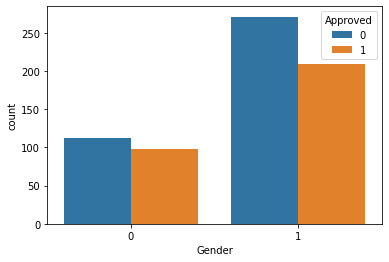

In [514]:
sns.countplot(data=data , x='Gender' , hue='Approved')

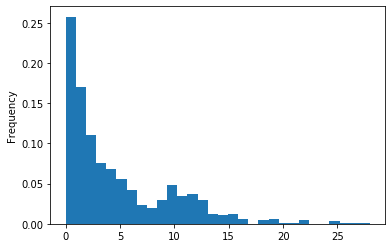

In [515]:
data['Debt'].plot(kind='hist',bins = 30 ,density = True)

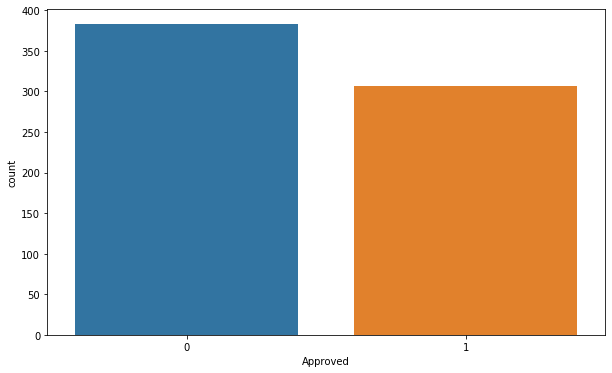

In [516]:
countPlot('Approved')

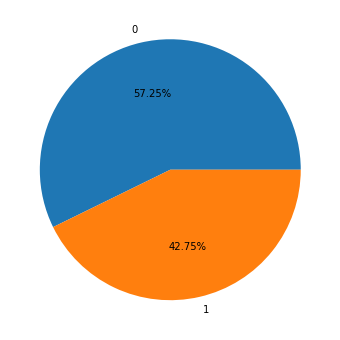

In [517]:
Pie('Employed')

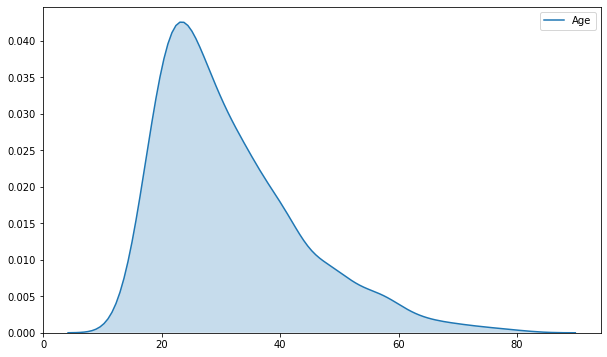

In [518]:
kdePlot('Age')

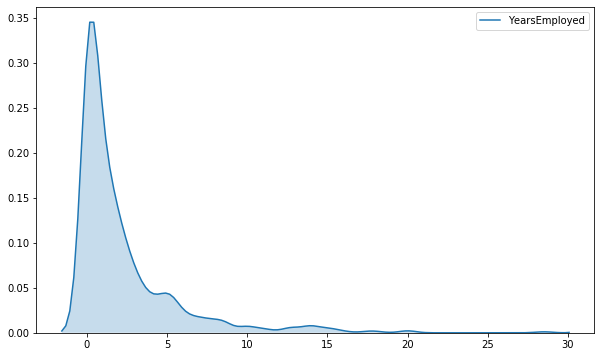

In [519]:
kdePlot('YearsEmployed')

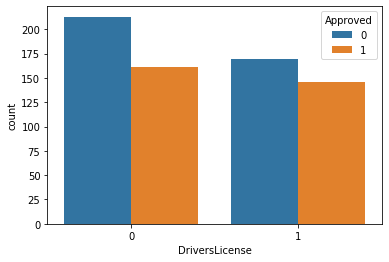

In [520]:
sns.countplot(data['DriversLicense'] , hue=data['Approved'])

### 4) Model building 

##### Data splitting

In [501]:
X = data.drop(['Approved','ZipCode'] , axis = 1)
y = data['Approved']

In [502]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20)

In [503]:
categoricalColumns = X.select_dtypes(include='object').columns.tolist()
numericalColumns = X.select_dtypes(exclude='object').columns.tolist()
categoricalColumns

['Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'Citizen']

In [504]:
fullPipeLine = ColumnTransformer([
    ('num',MinMaxScaler(),numericalColumns),
    ('cat',OneHotEncoder(),categoricalColumns)
])

In [505]:
X_train = fullPipeLine.fit_transform(X_train)
X_test = fullPipeLine.transform(X_test)

##### Model Training

In [506]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [507]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)} \n')
    print(f'Testing F1 : {f1_score(y_test, y_pred)}')
    print('*'*30)

Training Model LR 
--------------
Testing Confusion Matrix: 
[[59 14]
 [ 6 59]] 

Testing F1 : 0.8550724637681159
******************************
Training Model KNN 
--------------
Testing Confusion Matrix: 
[[60 13]
 [13 52]] 

Testing F1 : 0.8000000000000002
******************************
Training Model SVC 
--------------
Testing Confusion Matrix: 
[[61 12]
 [ 7 58]] 

Testing F1 : 0.8592592592592593
******************************
Training Model DT 
--------------
Testing Confusion Matrix: 
[[57 16]
 [13 52]] 

Testing F1 : 0.7819548872180452
******************************
Training Model RF 
--------------
Testing Confusion Matrix: 
[[61 12]
 [ 7 58]] 

Testing F1 : 0.8592592592592593
******************************
Training Model Naive Bayes 
--------------
Testing Confusion Matrix: 
[[65  8]
 [28 37]] 

Testing F1 : 0.6727272727272727
******************************


#### Checking Model

In [508]:
some_data = X.iloc[5:10]
some_label =y.iloc[5:10]

In [509]:
some_data_processed = fullPipeLine.transform(some_data)
some_data_predicted = models['RF'].predict(some_data_processed)
some_data_predicted

array([1, 1, 1, 0, 1], dtype=int64)

In [510]:
some_label.tolist()

[1, 1, 1, 1, 1]